In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

Datasets

Download one of the official datasets with:
bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]
Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions here.

In [4]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2021-06-03 03:53:56--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28.77M  3.62MB/s    in 7.0s    

2021-06-03 03:54:03 (4.10 MB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/1

facades/train/132.jpg
facades/train/133.jpg
facades/train/134.jpg
facades/train/135.jpg
facades/train/136.jpg
facades/train/137.jpg
facades/train/138.jpg
facades/train/139.jpg
facades/train/14.jpg
facades/train/140.jpg
facades/train/141.jpg
facades/train/142.jpg
facades/train/143.jpg
facades/train/144.jpg
facades/train/145.jpg
facades/train/146.jpg
facades/train/147.jpg
facades/train/148.jpg
facades/train/149.jpg
facades/train/15.jpg
facades/train/150.jpg
facades/train/151.jpg
facades/train/152.jpg
facades/train/153.jpg
facades/train/154.jpg
facades/train/191.jpg
facades/train/192.jpg
facades/train/193.jpg
facades/train/194.jpg
facades/train/195.jpg
facades/train/196.jpg
facades/train/197.jpg
facades/train/198.jpg
facades/train/199.jpg
facades/train/2.jpg
facades/train/20.jpg
facades/train/200.jpg
facades/train/201.jpg
facades/train/202.jpg
facades/train/203.jpg
facades/train/204.jpg
facades/train/205.jpg
facades/train/206.jpg
facades/train/207.jpg
facades/train/208.jpg
facades/train/2

Pretrained models

Download one of the official pretrained models with:
bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]
Or add your own pretrained model to ./checkpoints/{NAME}_pretrained/latest_net_G.pt

In [5]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2021-06-03 03:54:06--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  3.55MB/s    in 53s     

2021-06-03 03:54:59 (3.90 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



Training

python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA
Change the --dataroot and --name to your own dataset's path and model's name. Use --gpu_ids 0,1,.. to train on multiple GPUs and --batch_size to change the batch size. Add --direction BtoA if you want to train a model to transfrom from class B to A.

In [8]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA --n_epochs 10 --n_epochs_decay 5

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                       

[Errno 111] Connection refused


Could not connect to Visdom server. 
 Trying to start a server....
Command: /home/Yizhi/anaconda3/envs/pix2pix/bin/python -m visdom.server -p 8097 &>/dev/null &
create web directory ./checkpoints/facades_pix2pix/web...
/home/Yizhi/anaconda3/envs/pix2pix/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
learning rate 0.0002000 -> 0.0002000
(epoch: 1, iters: 100, time: 0.189, data: 0.365) G_GAN: 2.154 G_L1: 27.671 D_real: 0.283 D_fake: 0.178 
(epoch: 1, iters: 200, time: 0.1

(epoch: 15, iters: 400, time: 0.685, data: 0.003) G_GAN: 1.534 G_L1: 29.858 D_real: 0.319 D_fake: 0.271 
saving the model at the end of epoch 15, iters 6000
End of epoch 15 / 15 	 Time Taken: 57 sec


python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix
Change the --dataroot, --name, and --direction to be consistent with your trained model's configuration and how you want to transform images.
from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix: Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.
If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).
See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [9]:
!ls checkpoints/

facades_label2photo_pretrained	face_attempt2  face_attempt_b
facades_pix2pix			face_attempt3  horse2zebra
face_attempt1			face_attempt5  horse2zebra_pretrained


In [30]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

Visualize

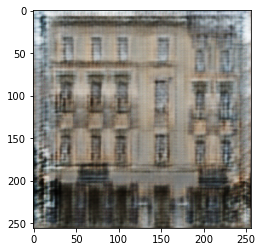

In [20]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_pix2pix/test_latest/images/100_fake_B.png')
plt.imshow(img)

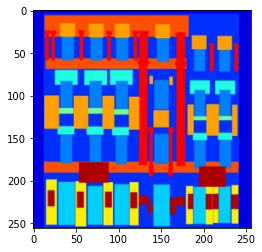

In [25]:
img = plt.imread('./results/facades_pix2pix/test_latest/images/100_real_A.png')
plt.imshow(img)

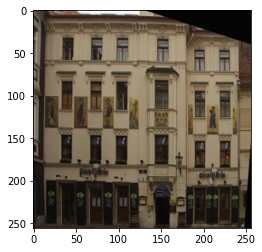

In [26]:
img = plt.imread('./results/facades_pix2pix/test_latest/images/100_real_B.png')
plt.imshow(img)

Face dataset

In [27]:
!python train.py --dataroot ./datasets/real_and_fake_face/scaled2 --name face_attemp1_pix2pix --model pix2pix --direction BtoA --n_epochs 10 --n_epochs_decay 5


----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/real_and_fake_face/scaled2	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                



Could not connect to Visdom server. 
 Trying to start a server....
Command: /home/Yizhi/anaconda3/envs/pix2pix/bin/python -m visdom.server -p 8097 &>/dev/null &
create web directory ./checkpoints/face_attemp1_pix2pix/web...
/home/Yizhi/anaconda3/envs/pix2pix/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
learning rate 0.0002000 -> 0.0002000
(epoch: 1, iters: 100, time: 0.223, data: 0.554) G_GAN: 1.174 G_L1: 18.845 D_real: 0.597 D_fake: 0.482 
(epoch: 1, iters: 200, time: 0.224, data: 0.002) G_GAN: 1.

In [28]:
!ls checkpoints/


facades_label2photo_pretrained	face_attempt2	horse2zebra
facades_pix2pix			face_attempt3	horse2zebra_pretrained
face_attemp1_pix2pix		face_attempt5
face_attempt1			face_attempt_b


In [42]:
!python test.py --dataroot ./datasets/real_and_fake_face/scaled2 --direction BtoA --model pix2pix --name face_attemp1_pix2pix


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/real_and_fake_face/scaled2	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0     

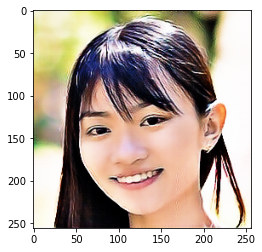

In [43]:
import matplotlib.pyplot as plt

img = plt.imread('./results/face_attemp1_pix2pix/test_latest/images/real_00301_fake_B.png')
plt.imshow(img)

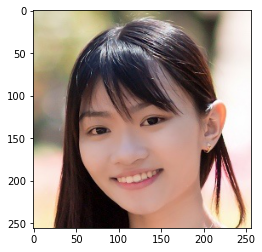

In [44]:
img = plt.imread('./results/face_attemp1_pix2pix/test_latest/images/real_00301_real_A.png')
plt.imshow(img)

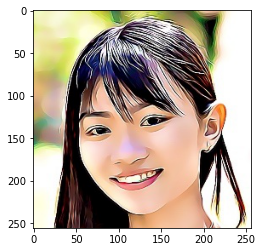

In [45]:
img = plt.imread('./results/face_attemp1_pix2pix/test_latest/images/real_00301_real_B.png')
plt.imshow(img)